In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.read_csv('HoC-GE2024-results-by-candidate.csv')
df2 = pd.read_csv('HoC-GE2024-results-by-constituency.csv')

Firstly, lets try to get the general election result - basically, the most important info, which we can see at any wiki election page.

In [ ]:
result_by_party = df1.groupby(['Party abbreviation'])['Votes'].sum().reset_index()
result_by_party['Vote percentage'] = result_by_party['Votes'] / result_by_party['Votes'].sum()

party_seats = df2.groupby('First party')['ONS ID'].count().reset_index().rename(columns={'First party': 'Party abbreviation', 'ONS ID': 'Seats'})
result_by_party = pd.merge(result_by_party, party_seats, how='left', on='Party abbreviation')
result_by_party.fillna({'Seats': 0}, inplace=True)
result_by_party['Seat percentage'] = result_by_party['Seats'] / result_by_party['Seats'].sum()

result_by_party=result_by_party.sort_values(by=['Seats', 'Votes'], ascending=False)
print(result_by_party)


   Party abbreviation    Votes  Vote percentage  Seats  Seat percentage
45                Lab  9708716         0.337007  411.0         0.632308
24                Con  6828925         0.237044  121.0         0.186154
42                 LD  3519143         0.122156   72.0         0.110769
75                SNP   724758         0.025158    9.0         0.013846
69                 SF   210891         0.007320    7.0         0.010769
..                ...      ...              ...    ...              ...
14                 CF      131         0.000005    0.0         0.000000
44               LPUK      113         0.000004    0.0         0.000000
60                PSY       99         0.000003    0.0         0.000000
18                 CP       91         0.000003    0.0         0.000000
35                IDD       45         0.000002    0.0         0.000000

[97 rows x 5 columns]


Once we have the general table, we can do something more useful - for example, comparing how well votes translate into seats.

Result shows that it doesn't translate that well. For example, Labour party has only received 33.7% of the popular vote, but got 63% of the seats.

With some domain knowledge, it becomes clear that this is result of British electoral system, where only constituency votes matter, and where no second-round is organised. Therefore, for example, it does not matter if you only win 24% of the vote within a region, as long as you are the biggest party, you win the region.

In a lot of constituencies Conservative party has been 'spoiled' by the Reform party, which hurt each other, and allowed Labour come in first.

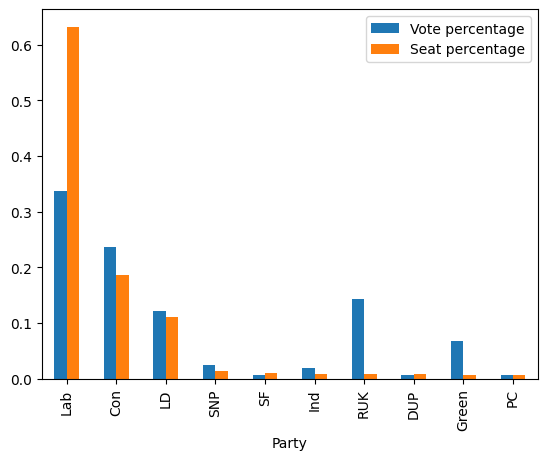

In [ ]:
result_by_party[['Party abbreviation', 'Vote percentage', 'Seat percentage']][:10].plot(kind='bar', x='Party abbreviation', xlabel='Party');

Now lets try to get the boxplot of how well each party did in each constituency.

As we can expect, two biggest parties, Labour and Conservative, have both done pretty well, though there is a big range to their results.

Additionally, we can see that Greens, Independents and Liberal Democrats have a lot outliers. This is causesd by the fact that these parties tend to compete throughout the country, in all 650 seats, but generally do very poorly, so outliers are the seats they actually won.

SNP, on the other hand, seems to have a few outliers that are below the IQR. These seem to be more genuine outliers, since this party tends to do really well In Scotland, and these are the seats that they did particularly bad in. This could prove an interesting study.



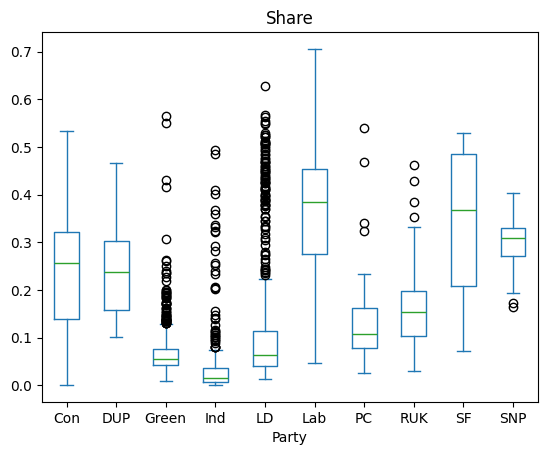

In [ ]:
party_names = list(result_by_party['Party abbreviation'].values)
shares_by_party_constituency = df1[df1['Party abbreviation'].isin(party_names[:10])].groupby(['Constituency name', 'Party abbreviation'])['Share'].sum().reset_index().sort_values('Party abbreviation', key=lambda x: [party_names.index(i) for i in x], ascending=True)
shares_by_party_constituency.plot(kind='box', by='Party abbreviation', column='Share', xlabel='Party');

Next we will try to get correlation matrix of results of each party.

Results, in some ways, are understandable, and in other ways are surprising.
- Labour and Conservatives have negative correlation (unsurprising - they are the main competitors)
- Labour and Liberals have very negative correlation (unsurprising - they have similar electorate, and if they both exist, they hurt each other)
- Labour and Greens have a positive correlation (unsurprising - greens have a bigger chance to win over labour voters)
- Conservative and Reform have a negative correlation (surprising - you would expect that only one of these party to exist, since they hurt each other. Perhaps this is because Reform is a new party, so it's not yet set in stone)

In [ ]:
shares_by_party = df2
list_of_party_columns = ['Con', 'Lab', 'LD', 'RUK', 'Green', 'SNP', 'PC', 'DUP', 'SF', 'SDLP', 'UUP', 'APNI', 'All other candidates', 'Of which other winner']
for party in list_of_party_columns:
    shares_by_party[party] = shares_by_party[party]/shares_by_party['Valid votes']

print(shares_by_party[['Con', 'Lab', 'LD', 'RUK', 'Green']].corr())

            Con       Lab        LD       RUK     Green
Con    1.000000 -0.329508  0.231433  0.296043 -0.227589
Lab   -0.329508  1.000000 -0.608905  0.115493  0.311863
LD     0.231433 -0.608905  1.000000 -0.186405 -0.148513
RUK    0.296043  0.115493 -0.186405  1.000000 -0.196965
Green -0.227589  0.311863 -0.148513 -0.196965  1.000000


To dig deeper into the surprising correlation result, I have decided to take only those constituencies, which labour has managed to take from the Conservative party. There are 182/650 such constiutencies.

It would seem that in these instances, there has been negative correlation between the Conservative and Reform parties. This would imply that in these vulnerable seats right-wing vote has actually been pretty consolidated.

This would disprove the common conception, that right-wing split has been the reason for the Conservative defeat, but obviously a deeper study is required.

In [ ]:
print(shares_by_party[['Con', 'Lab', 'LD', 'RUK', 'Green']][shares_by_party['Result']=='Lab gain from Con'].corr())

            Con       Lab        LD       RUK     Green
Con    1.000000 -0.333757  0.021004 -0.463720 -0.034334
Lab   -0.333757  1.000000 -0.303859 -0.152320  0.006823
LD     0.021004 -0.303859  1.000000 -0.393862 -0.016057
RUK   -0.463720 -0.152320 -0.393862  1.000000 -0.210723
Green -0.034334  0.006823 -0.016057 -0.210723  1.000000
